#### Grupo I. Canal de depolarización

El primer canal, conocido como canal de depolarización simetrico, en este caso sinonimo de infidelidad de compuertas (gate infidelities) o canal de despolarización (depolarizing channel). 
Esencialmente realiza la simulación los errores por intercambio de bits (bit-flip) y intercambio de fases (phase-flip) debidos a la infidelidad de las compuertas dentro del circuito como una despolarización de canal.

Definimos
$p_1$: probabilidad que un error en este grupo ocurra;
$X$: define el bit-flip;
$Z$: define el phase-flip;
$Y$: si ambas bit y phase flip ocurren.

Todos los tres tipos de error de Pauli tienen la misma probabilidad de ocurrir.

El canal de depolarización puede ser representado por los operadores
$$ K_{D_0} = \sqrt{1-p_1}I $$
$$ K_{D_1} = \sqrt{\frac{p_1}{3}}X $$
$$ K_{D_2} = \sqrt{\frac{p_1}{3}}Z $$
$$ K_{D_3} = \sqrt{\frac{p_1}{3}}Y $$

El efecto del canal de depolarización sobre un sistema cuántico puede ser expresado de la siguiente forma
$$ \rho \rightarrow \mathcal{D}(\rho) = \sum_{i=0}^3 K_{D_i}\rho K_{D_i}^* $$
$$ =  K_{D_0}\rho K_{D_0}^* +  K_{D_1}\rho K_{D_1}^* +  K_{D_2}\rho K_{D_2}^* +  K_{D_3}\rho K_{D_3}^*$$
$$ = \sqrt{1-p_1}I \rho \sqrt{1-p_1}I + \sqrt{\frac{p_1}{3}}X \rho \sqrt{\frac{p_1}{3}}X + \cdots $$
$$ = (1-p_1)\rho + \frac{p_1}{3} (X \rho X + Z \rho Z + Y \rho Y) $$

donde $\rho$ es la matriz densidad de un qubit. 

#### El modelo de ruido cuántico sobre un circuito de un solo qubit

El canal de depolarización (DC) es aplicado despúes de cada compuerta durante la evolución del circuito.

### Grupo II. Canal SPAM: Errores producidos en la preparación del estado, y medición

Este canal es esencialmente un error de Pauli $X$, pero difiere del grupo I porque se refiere a diferentes aspectos del hardware y la computación.

Definimos
$p_2$: la probabilidad de que la medición es incorrecta.

##### Podemos representar el canal SPAM por los errores en la medición, definiendo los siguientes operadores de Kraus
$$ K_{M_0} = \sqrt{1-p_2}I $$
$$ K_{M_1} = \sqrt{p_2}X $$

El efecto del canal SPAM para errores de medición es expresado como sigue
$$ \rho \rightarrow \mathcal{S}(\rho) = K_{M_0}\rho K_{M_0}^* + K_{M_1}\rho K_{M_1}^*$$

##### En el caso de la preparación de estado el canal de error es de forma similar al anterior:
El error consiste en que el qubit preparado no coincide con el estado deseado, si

$p_2'$: probabilidad de que el estado sea invertido por $X$

Se tiene el sistema
$$ \rho \rightarrow \mathcal{S}'(\rho) =  K_{M_0}'\rho K_{M_0}'^* + K_{M_1}'\rho K_{M_1}'^* $$
donde las primas indican que se definen igual que en el caso del canal de errores de medición con probabilidad $p_2'$.

El modelo del canal de SPAM es aplicado al inicio, despues de la preparación de un estado (si ocurre), y al final antes de la medición.

In [1]:
import numpy as np
from qiskit import QuantumCircuit,QuantumRegister, transpile
from qiskit_aer import AerSimulator
from qiskit.tools.visualization import plot_histogram
from qiskit.circuit.library import GroverOperator, MCMT, ZGate
import math
import matplotlib.pyplot as plt

# Import from Qiskit Aer noise module
from qiskit_aer.noise import (NoiseModel, QuantumError, ReadoutError,
    pauli_error, depolarizing_error, thermal_relaxation_error)

# Import for running in IBM Quantum
from  qiskit_ibm_provider import IBMProvider

In [2]:
#OBTENIENDO BACKENDS DE IBMQ
IBMProvider.save_account(token='76e96489455b765e6e2a25c4ff28b6f5ade8c577d05c7c45d31ec96873a84d97d7ebea3859b19b5e1a9bd8dc6e4ffdd0dbcc4d362399a0ca5b2129daab6faaf1', overwrite=True)
provider = IBMProvider()
print(provider.backends())
ibm_nairobi_backend = provider.get_backend('ibm_nairobi')

[<IBMBackend('simulator_mps')>, <IBMBackend('simulator_statevector')>, <IBMBackend('ibm_lagos')>, <IBMBackend('ibm_brisbane')>, <IBMBackend('ibmq_qasm_simulator')>, <IBMBackend('simulator_stabilizer')>, <IBMBackend('ibm_nairobi')>, <IBMBackend('ibm_perth')>, <IBMBackend('simulator_extended_stabilizer')>]


### Simulación

1. El sistema más sencillo de un qubit

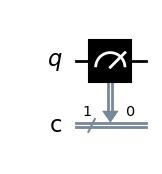

In [3]:
circuit = QuantumCircuit(1, 1)
circuit.measure(0, 0)
circuit.draw(output="mpl")

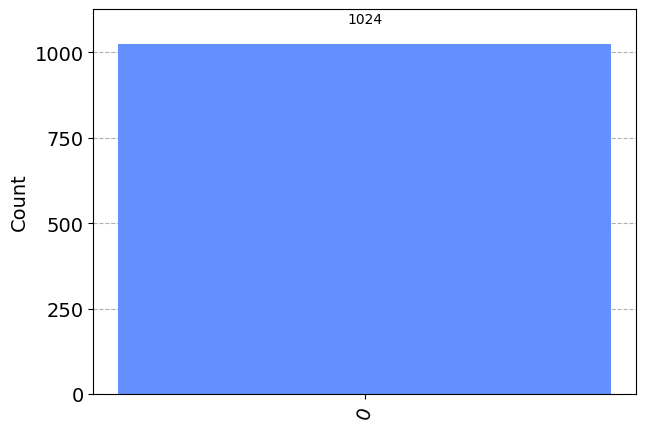

In [4]:
#Simulación ideal
sim_ideal = AerSimulator()
result_ideal = sim_ideal.run(circuit).result()
plot_histogram(result_ideal.get_counts(0))

In [11]:
# Probabilidad de error
p_2 = 0.1
error_meas = pauli_error([('X', p_2),('I', 1-p_2)])

# Definicion del Modelo de ruido
noise_bit_flip = NoiseModel()
noise_bit_flip.add_all_qubit_quantum_error(error_meas, "measure")
print(noise_bit_flip)

NoiseModel:
  Basis gates: ['cx', 'id', 'rz', 'sx']
  Instructions with noise: ['measure']
  All-qubits errors: ['measure']


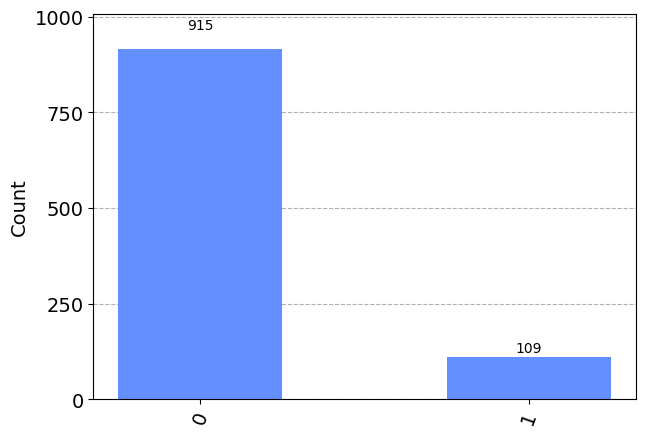

In [12]:
# Simulación ruidosa
sim_noise = AerSimulator(noise_model=noise_bit_flip)
circ_tnoise = transpile(circuit, sim_noise)             # Circuito trasnpilador para compuertas ruidosas básicas
result_bit_flip = sim_noise.run(circ_tnoise).result()   # Run and get counts (1024)
counts_bit_flip = result_bit_flip.get_counts(0)

plot_histogram(counts_bit_flip)

## Ejecucion Quantum Lab

In [14]:
#EJECUCION
shots=1024
qc_transpiled = transpile(circuit,ibm_nairobi_backend)
result = ibm_nairobi_backend.run(qc_transpiled,shots=shots).result()
counts = result.get_counts(0)

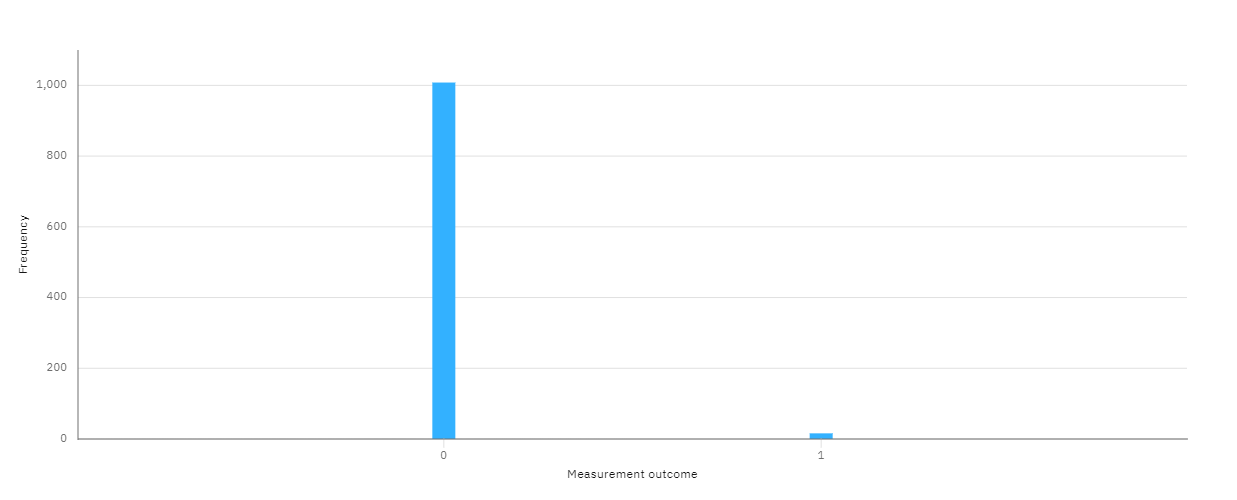

In [15]:
from PIL import Image
img = Image.open(r'E:\Proyecto Quantum Quipu\QuantumQuipu_NoiseAndNativeGates\Histogramas_SobreHardware\cmspeq2fwrrg00882d9g_histogram.png')
display(img)
# 0 -> 1008 ; 1 -> 16 

2. Ejemplo $n$ qubits

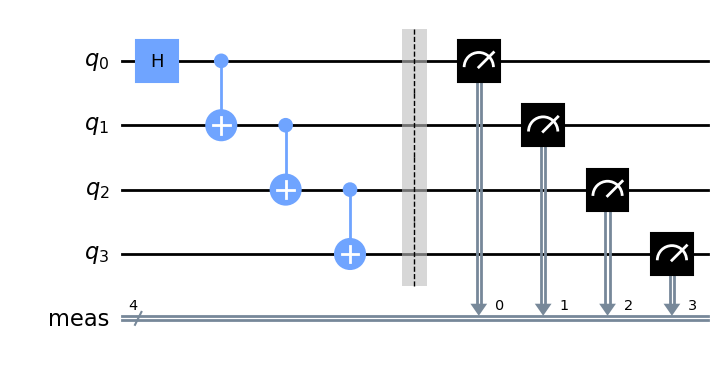

In [16]:
# Especificación del sistema
n_qubits = 4
circ = QuantumCircuit(n_qubits)

# Circuito Test
circ.h(0)
for qubit in range(n_qubits - 1):
    circ.cx(qubit, qubit + 1)
circ.measure_all()
circ.draw(output="mpl")

PROBABILIDAD DE ERROR:  0
noise model:  NoiseModel: Ideal


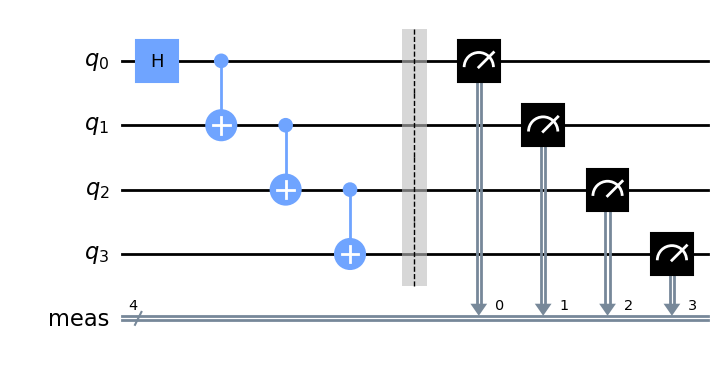

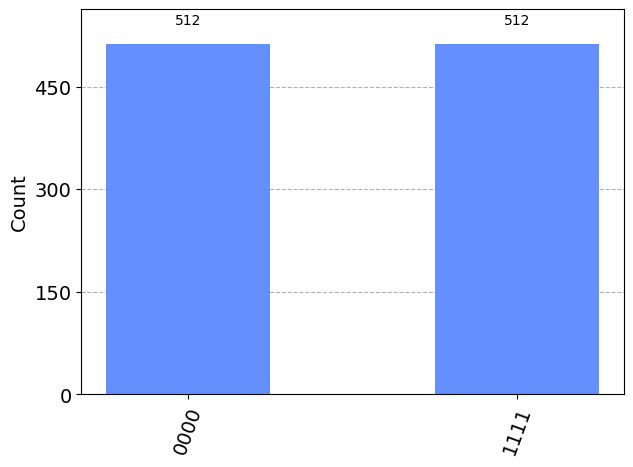

PROBABILIDAD DE ERROR:  0.05
noise model:  NoiseModel:
  Basis gates: ['cx', 'id', 'rz', 'sx']
  Instructions with noise: ['measure']
  All-qubits errors: ['measure']


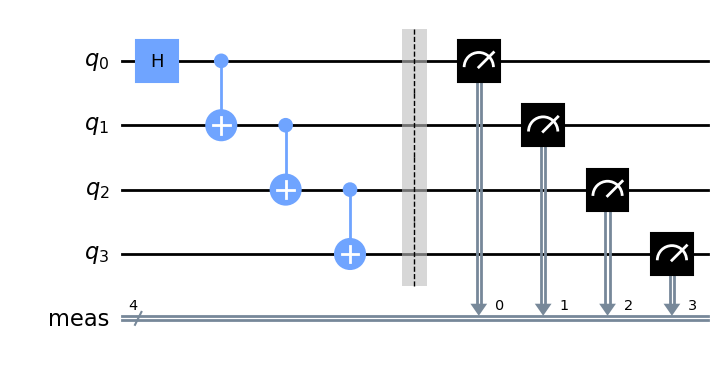

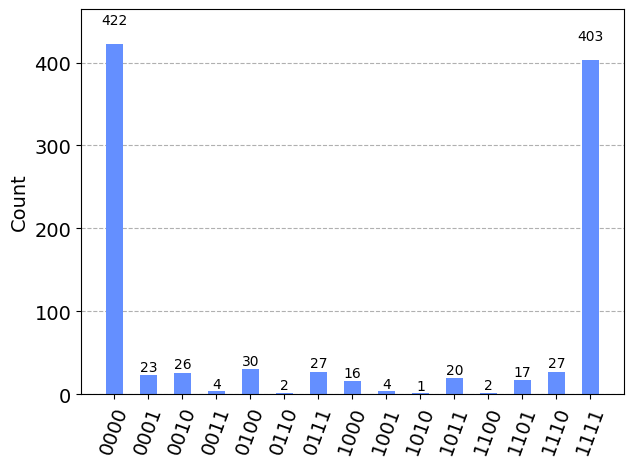

PROBABILIDAD DE ERROR:  0.1
noise model:  NoiseModel:
  Basis gates: ['cx', 'id', 'rz', 'sx']
  Instructions with noise: ['measure']
  All-qubits errors: ['measure']


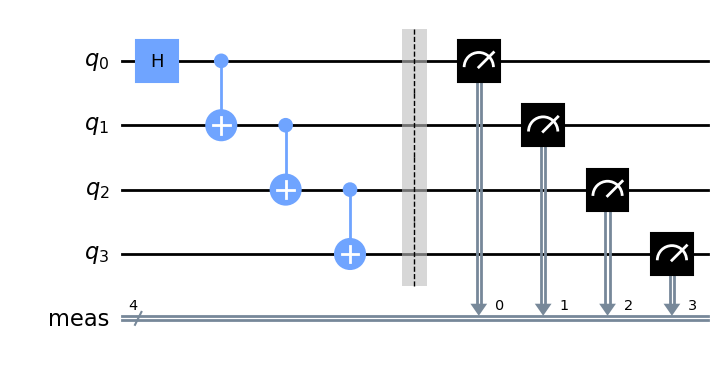

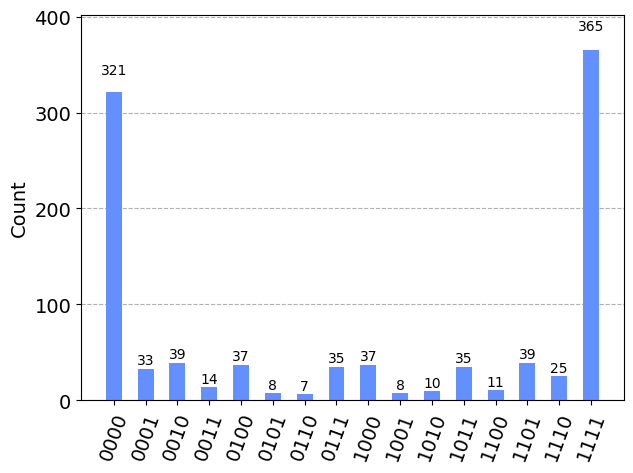

PROBABILIDAD DE ERROR:  0.15
noise model:  NoiseModel:
  Basis gates: ['cx', 'id', 'rz', 'sx']
  Instructions with noise: ['measure']
  All-qubits errors: ['measure']


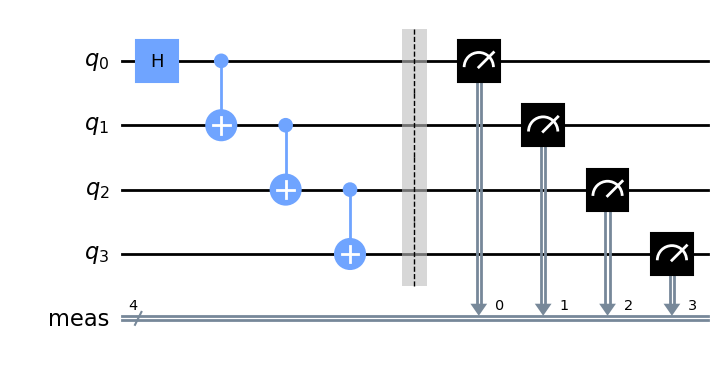

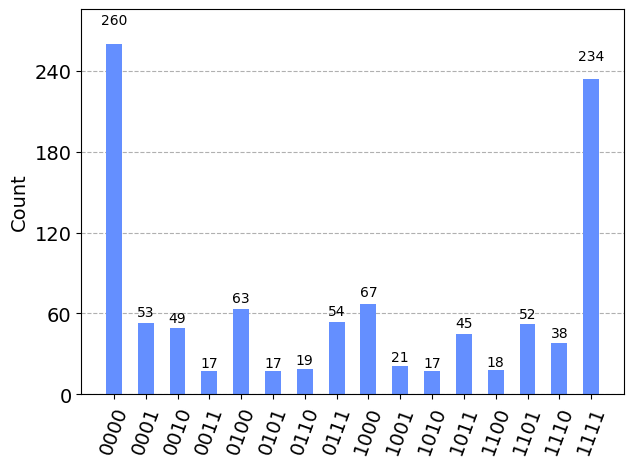

PROBABILIDAD DE ERROR:  0.2
noise model:  NoiseModel:
  Basis gates: ['cx', 'id', 'rz', 'sx']
  Instructions with noise: ['measure']
  All-qubits errors: ['measure']


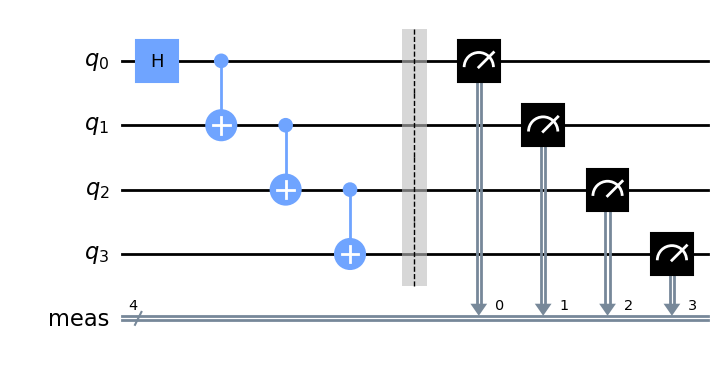

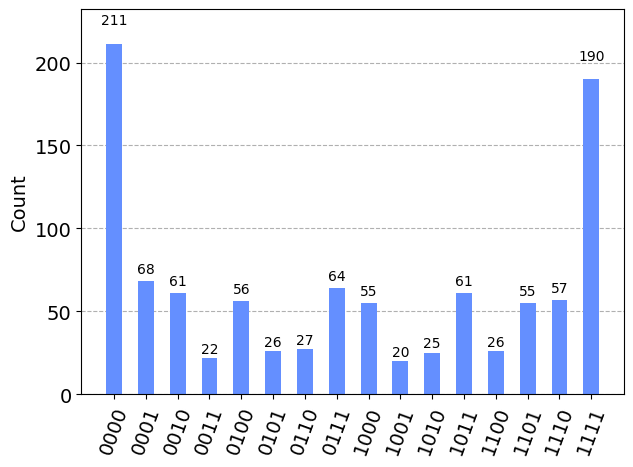

PROBABILIDAD DE ERROR:  0.25
noise model:  NoiseModel:
  Basis gates: ['cx', 'id', 'rz', 'sx']
  Instructions with noise: ['measure']
  All-qubits errors: ['measure']


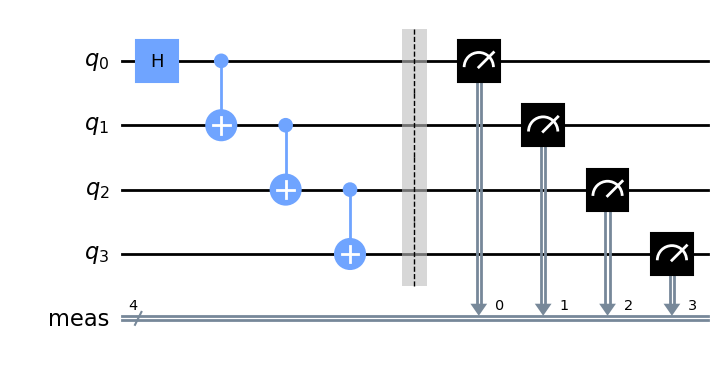

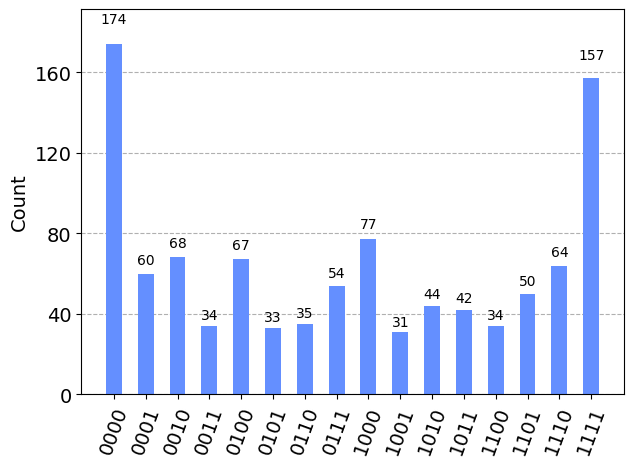

In [22]:
# Añadiendo error
errorProbabilities = [
    0,
    0.05,
    0.1,
    0.15,
    0.2,
    0.25,
]

results = []
for i in errorProbabilities:
    print('PROBABILIDAD DE ERROR: ',i)     
    noiseModel = NoiseModel()
    error_meas = pauli_error([('X', i),('I', 1-i)])
    noiseModel.add_all_qubit_quantum_error(error_meas, "measure")
    print('noise model: ',noiseModel)
    #EJECUCION
    sim_noise = AerSimulator(noise_model=noiseModel)
    circ_tnoise = transpile(circ, sim_noise)
    result_bit_flip = sim_noise.run(circ_tnoise).result()
    counts_bit_flip = result_bit_flip.get_counts(0)
    display(plot_histogram(counts_bit_flip))
        
    results.append(counts_bit_flip)

## Ejecucion Quantum Lab 

In [19]:
#EJECUCION
shots=1024
qc_transpiled = transpile(circ,ibm_nairobi_backend)
result = ibm_nairobi_backend.run(qc_transpiled,shots=shots).result()
counts = result.get_counts(0)

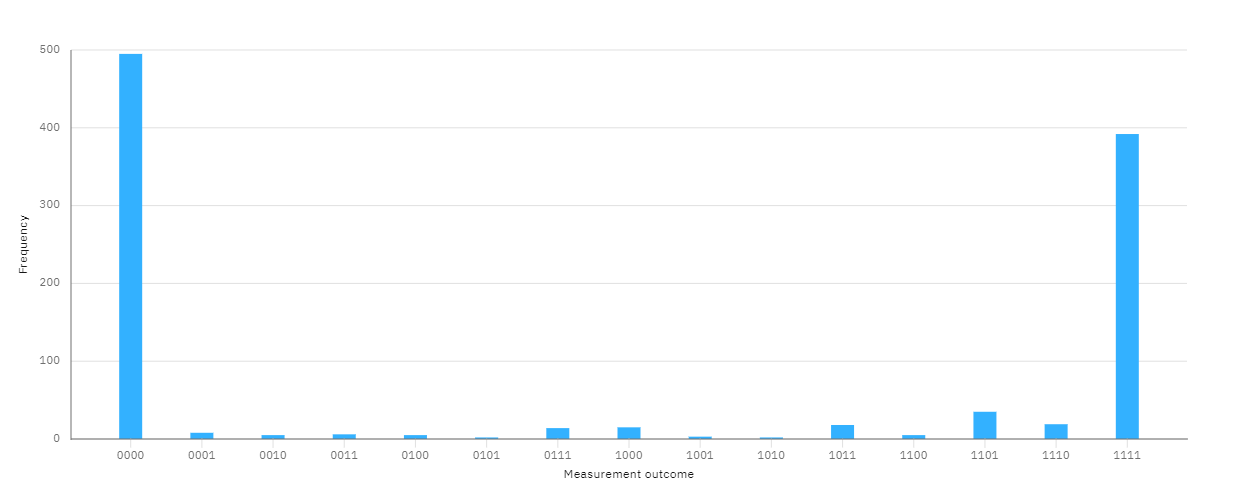

In [21]:
from PIL import Image
img = Image.open(r'E:\Proyecto Quantum Quipu\QuantumQuipu_NoiseAndNativeGates\Histogramas_SobreHardware\cmspkvfeskrg008xw2jg_histogram.png')
display(img)
# 0000 -> 495 ; 1 -> 392

Referencias

https://qiskit.org/ecosystem/aer/tutorials/3_building_noise_models.html
https://gist.github.com/IvanIsCoding/8a86d679f371f7d87341f985f43d40f6
